In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

**Datasets**


In [2]:
month_full = "/work/bd0854/b380103/eso4clima/output/202001_mon_ERA5_full_ts.nc"
month_masked = "/work/bd0854/b380103/eso4clima/output/202001_mon_ERA5_masked_ts.nc"

day_full = "/work/bd0854/b380103/eso4clima/output/202001_day_ERA5_full_ts.nc"
day_masked = "/work/bd0854/b380103/eso4clima/output/202001_day_ERA5_masked_ts.nc"

hr_full = "/work/bd0854/b380103/eso4clima/output/202001_hr_ERA5_full_ts.nc"
hr_masked = "/work/bd0854/b380103/eso4clima/output/202001_hr_ERA5_masked_ts.nc"

In [3]:
ds_mfull = xr.open_dataset(month_full)


In [22]:
ds_mm = xr.open_dataset(month_masked)

In [4]:
ds_mfull

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 1, bnds: 2, lon: 1440, lat: 720)
Coordinates:
  * time       (time) datetime64[ns] 8B 2020-01-16T11:30:00
  * lon        (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat        (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 16B ...
    ts         (time, lat, lon) float32 4MB ...
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Oct 31 09:31:04 2025: cdo timmean 202001_ERA5_full_ts.n...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...

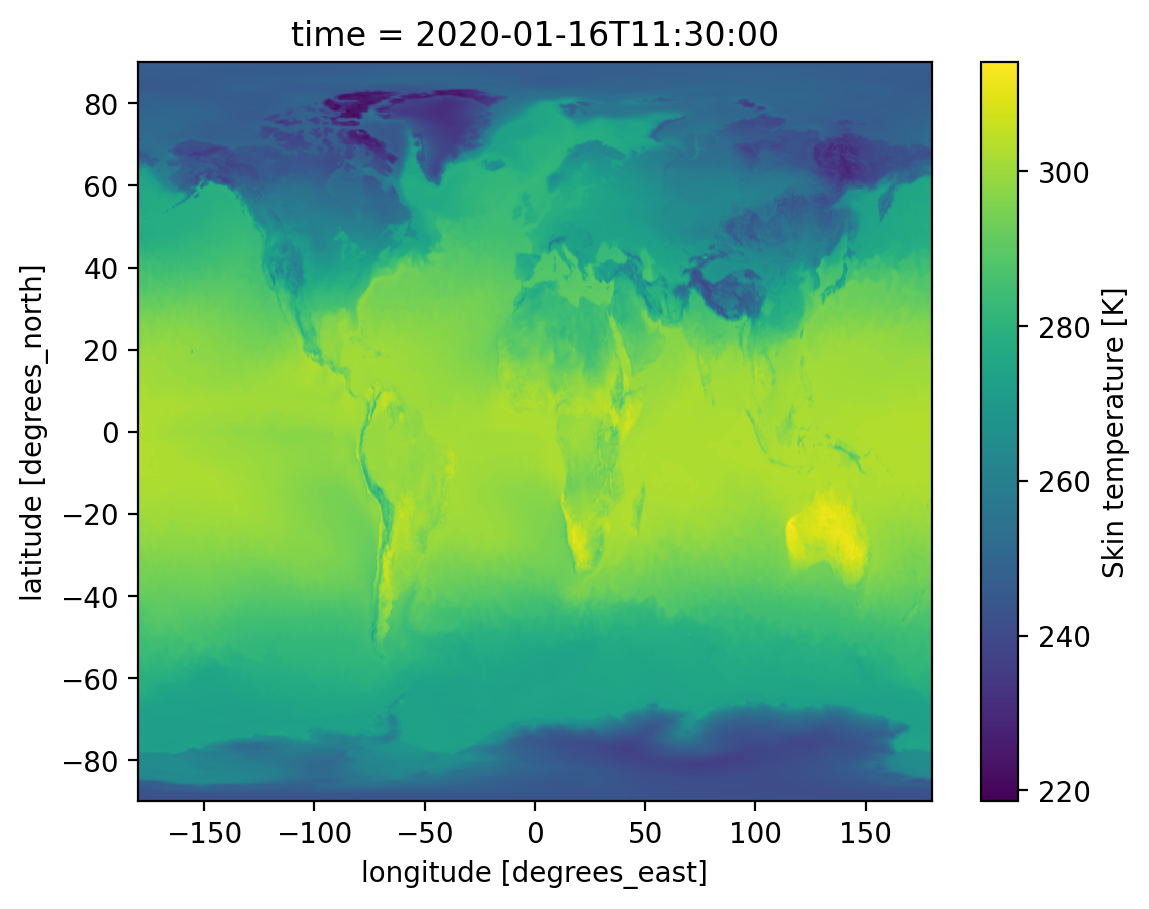

In [5]:
ds_mfull["ts"].plot()

In [6]:
ds_mm = xr.open_dataset(month_masked)

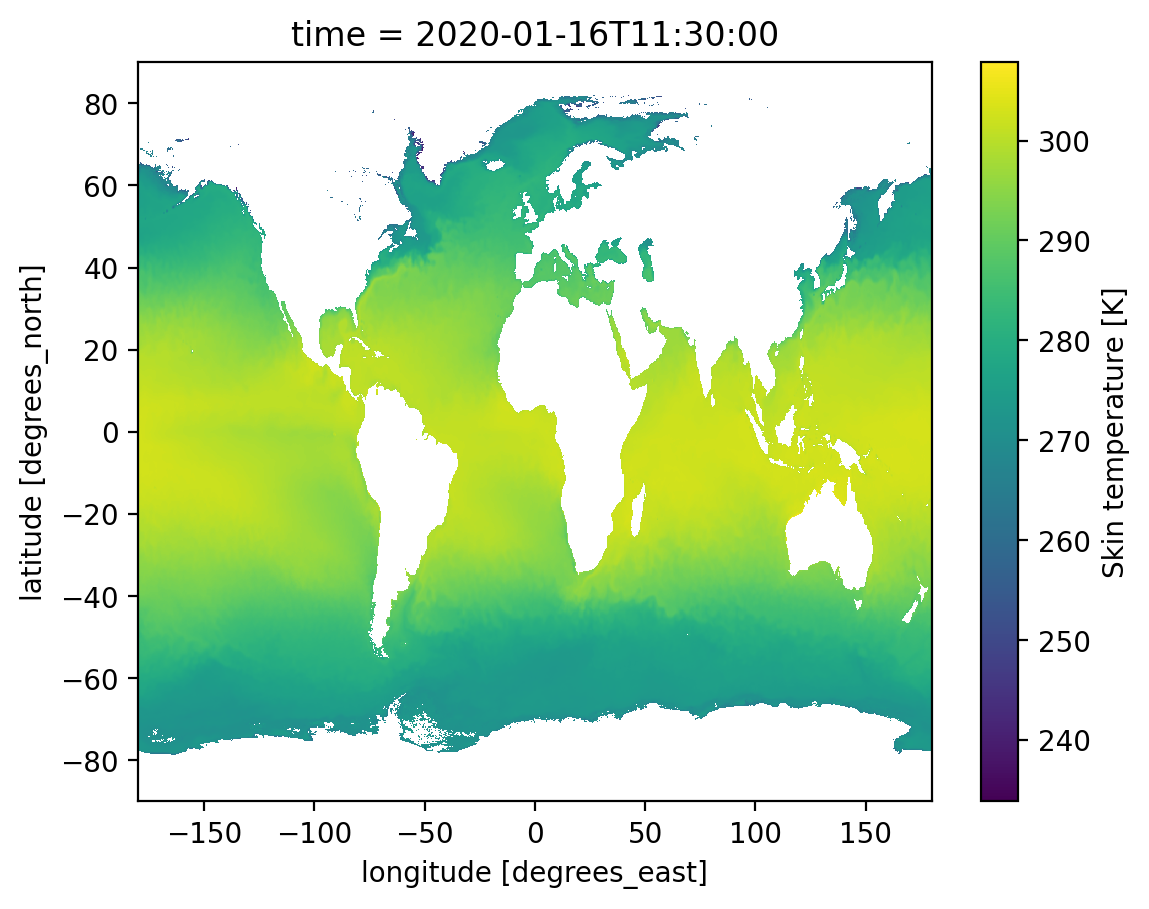

In [7]:
ds_mm["ts"].plot()

In [8]:
ds_mhr = xr.open_dataset(hr_masked)


In [9]:
ds_fhr = xr.open_dataset(hr_full)

In [10]:
(ds_mhr)


<xarray.Dataset> Size: 3GB
Dimensions:  (time: 744, lon: 1440, lat: 720)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2020-01-01 ... 2020-01-31T23:00:00
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    ts       (time, lat, lon) float32 3GB ...
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Nov 05 13:46:14 2025: cdo cat 20200101_ERA5_masked_ts.n...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...

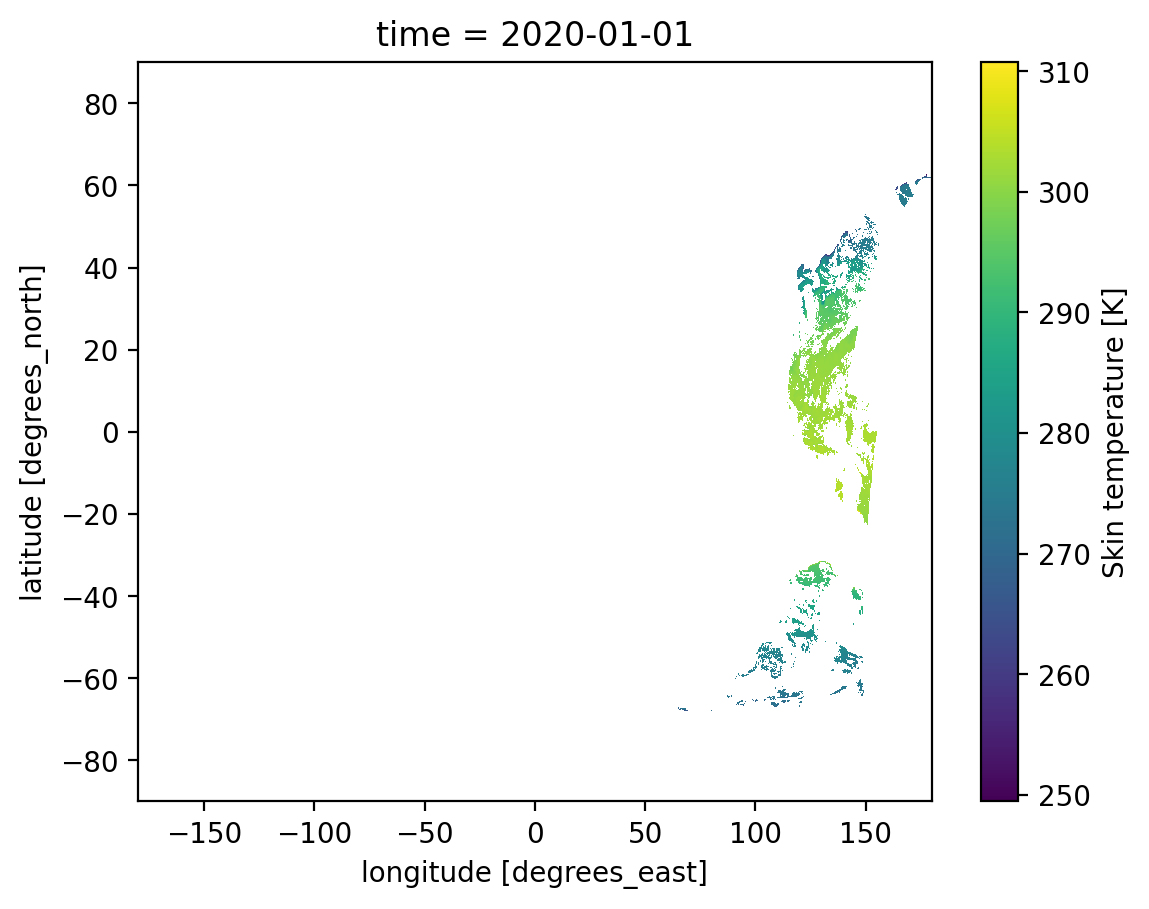

In [11]:
ds_mhr["ts"].isel(time=0).plot()

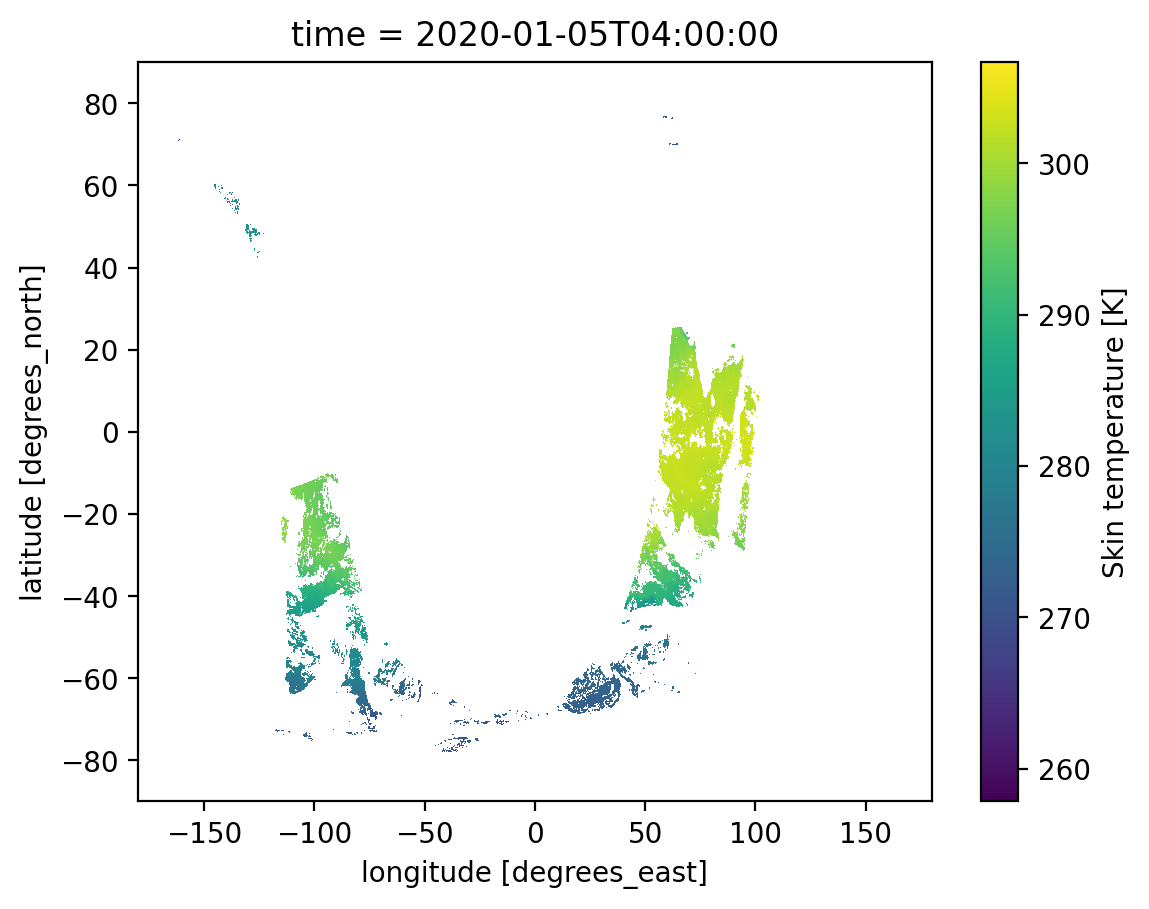

In [12]:
ds_mhr["ts"].isel(time=100).plot()

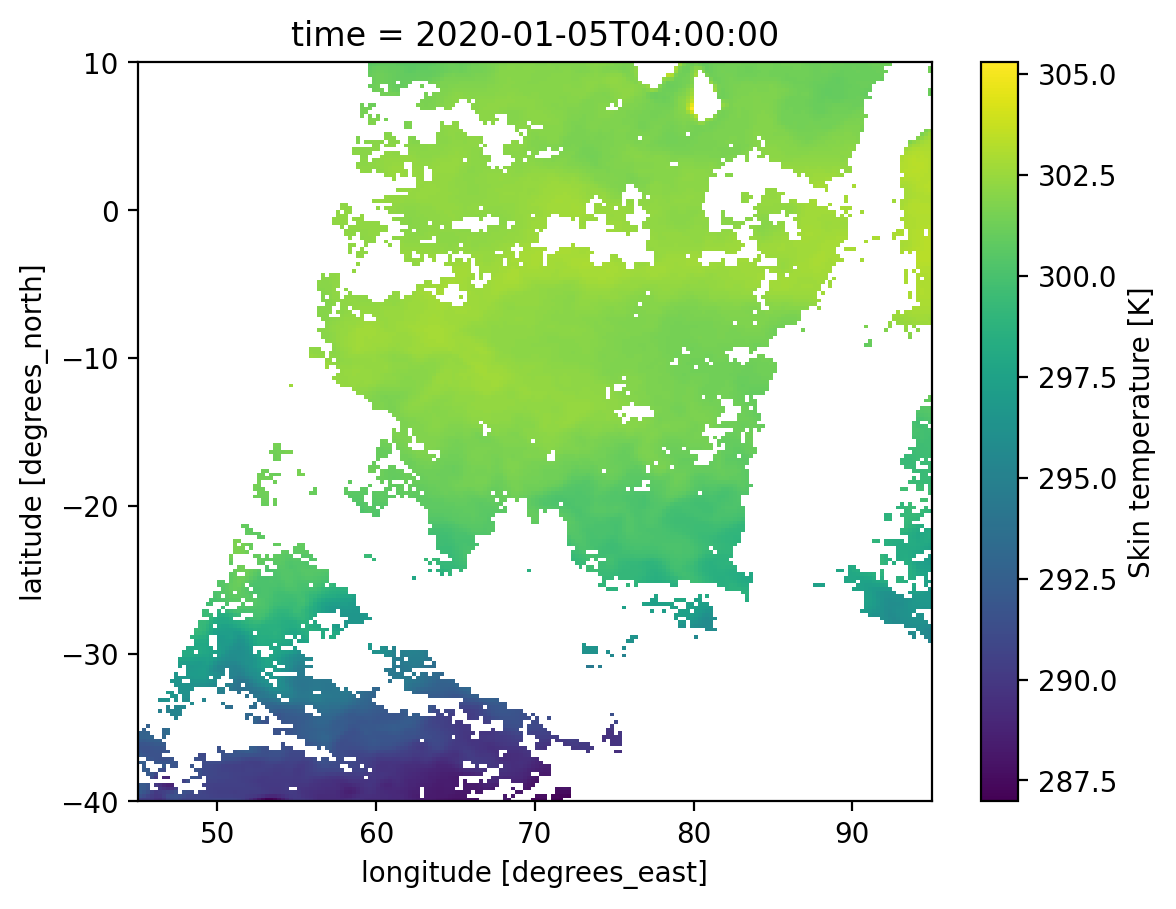

In [13]:
ds_mhr["ts"].isel(lat=slice(200,400),lon=slice(900,1100),time=100).plot()


In [14]:
subset = ds_mhr["ts"].isel(lat=slice(200,400),lon=slice(900,1100))

In [15]:
subsetfull = ds_fhr["ts"].isel(lat=slice(200,400),lon=slice(900,1100))

In [15]:
subsetfull = ds_fhr["ts"].isel(lat=slice(200,400),lon=slice(900,1100))

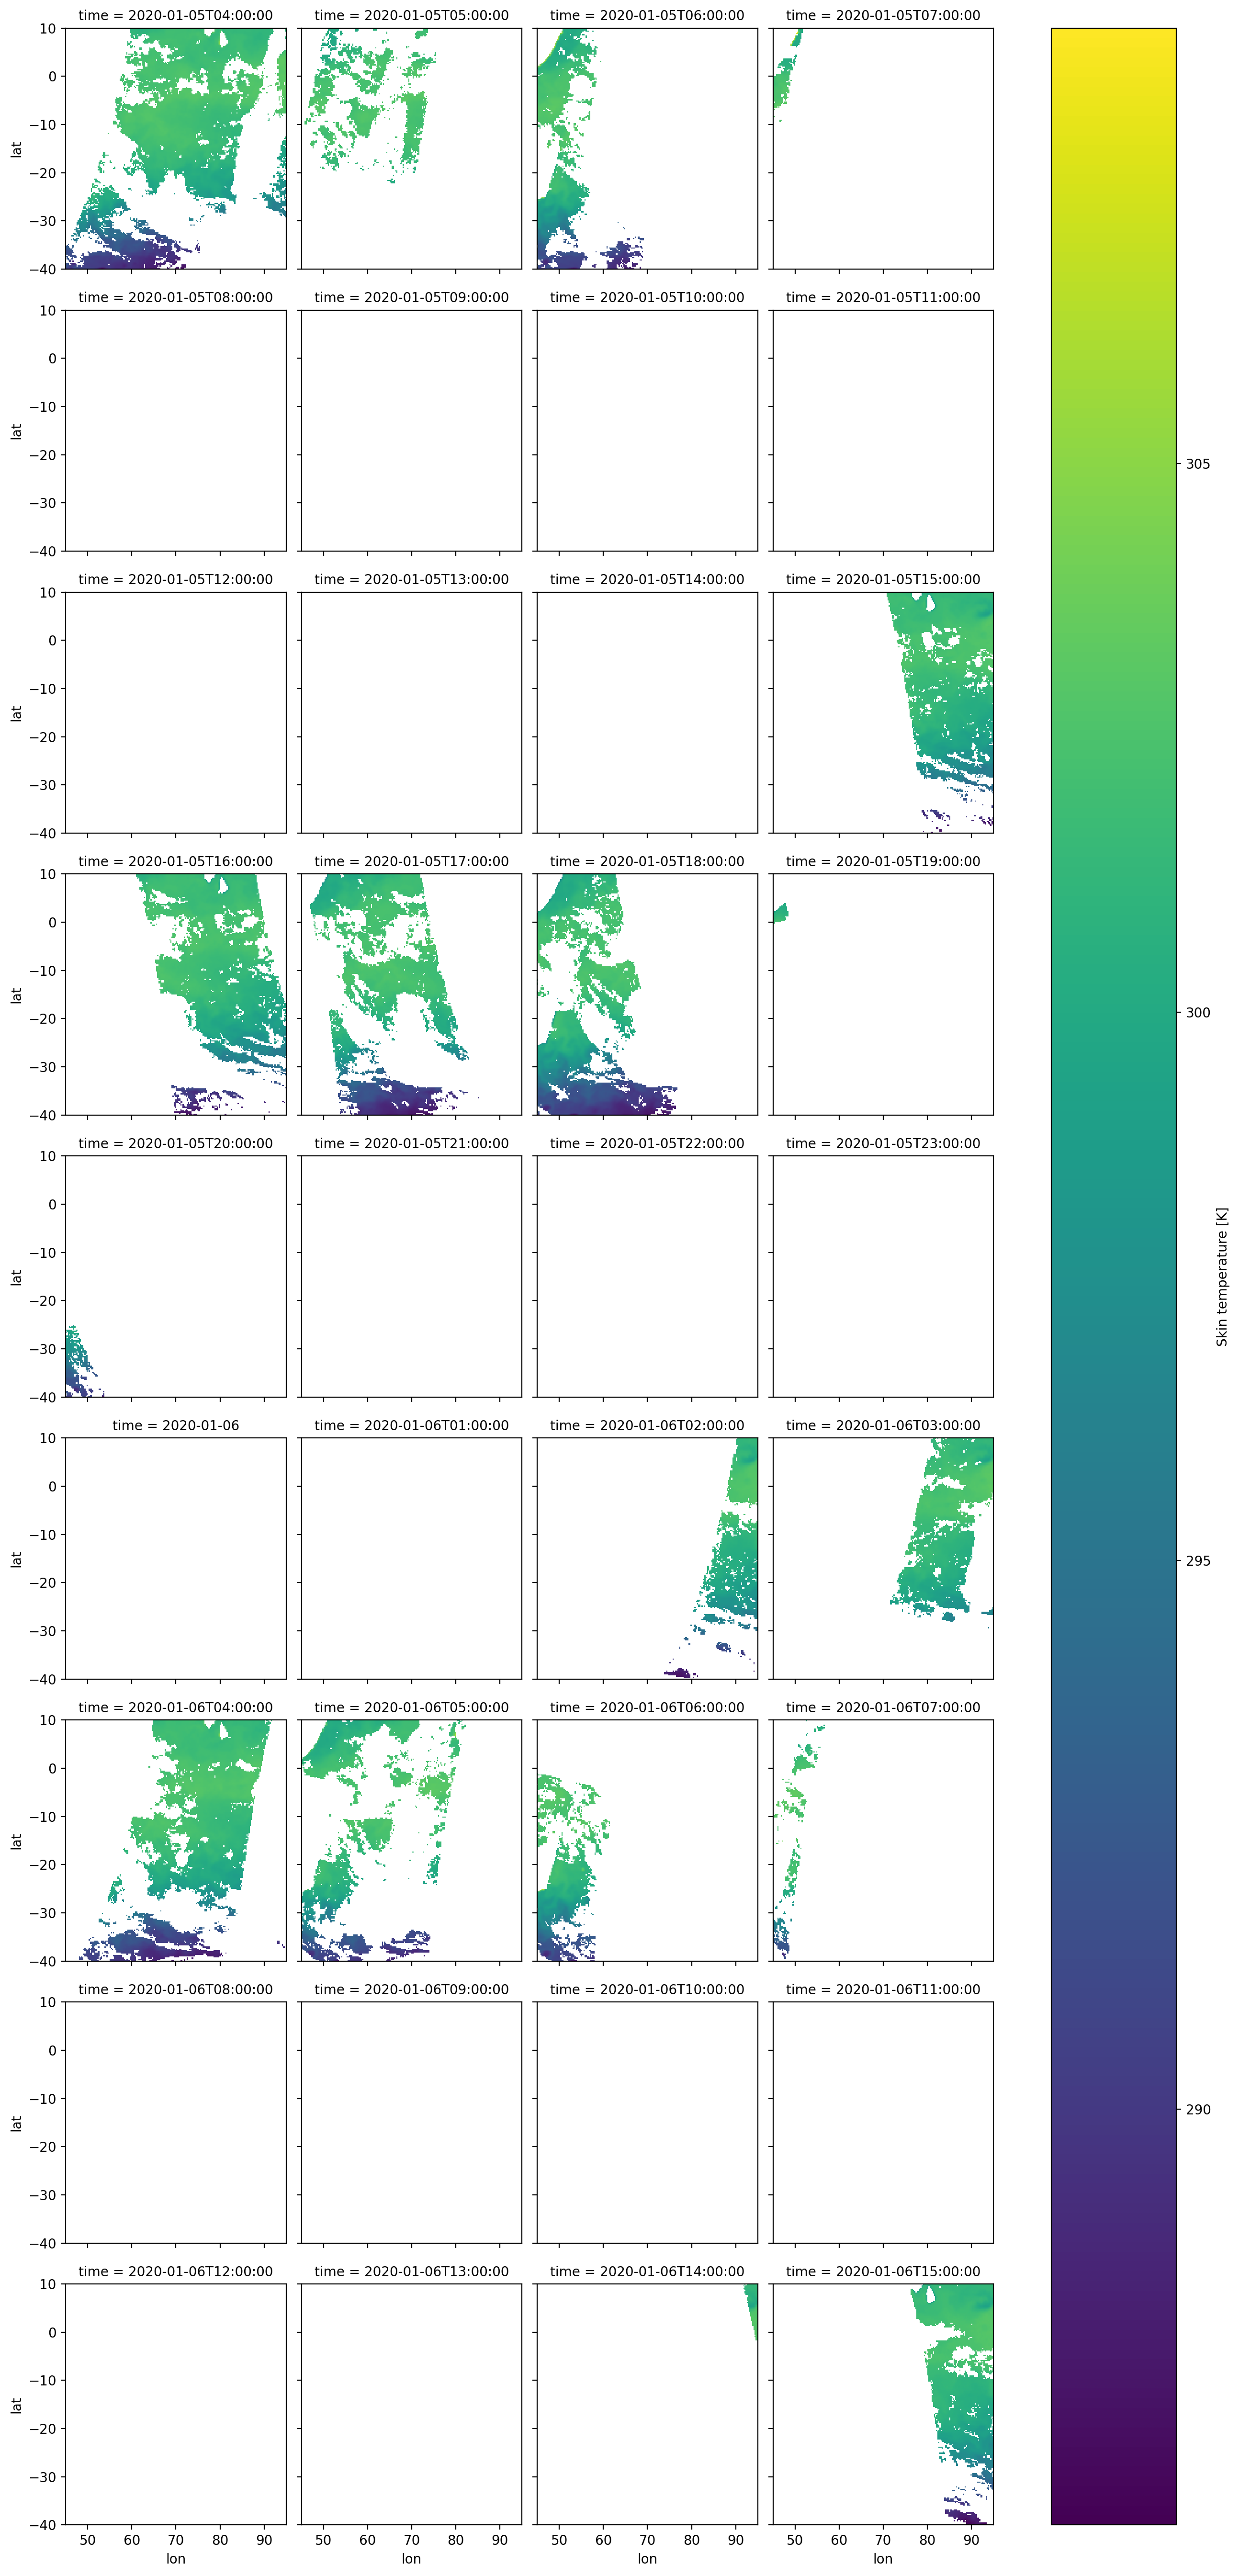

In [16]:
subset.isel(time=slice(100,136)).plot(col="time",col_wrap=4)

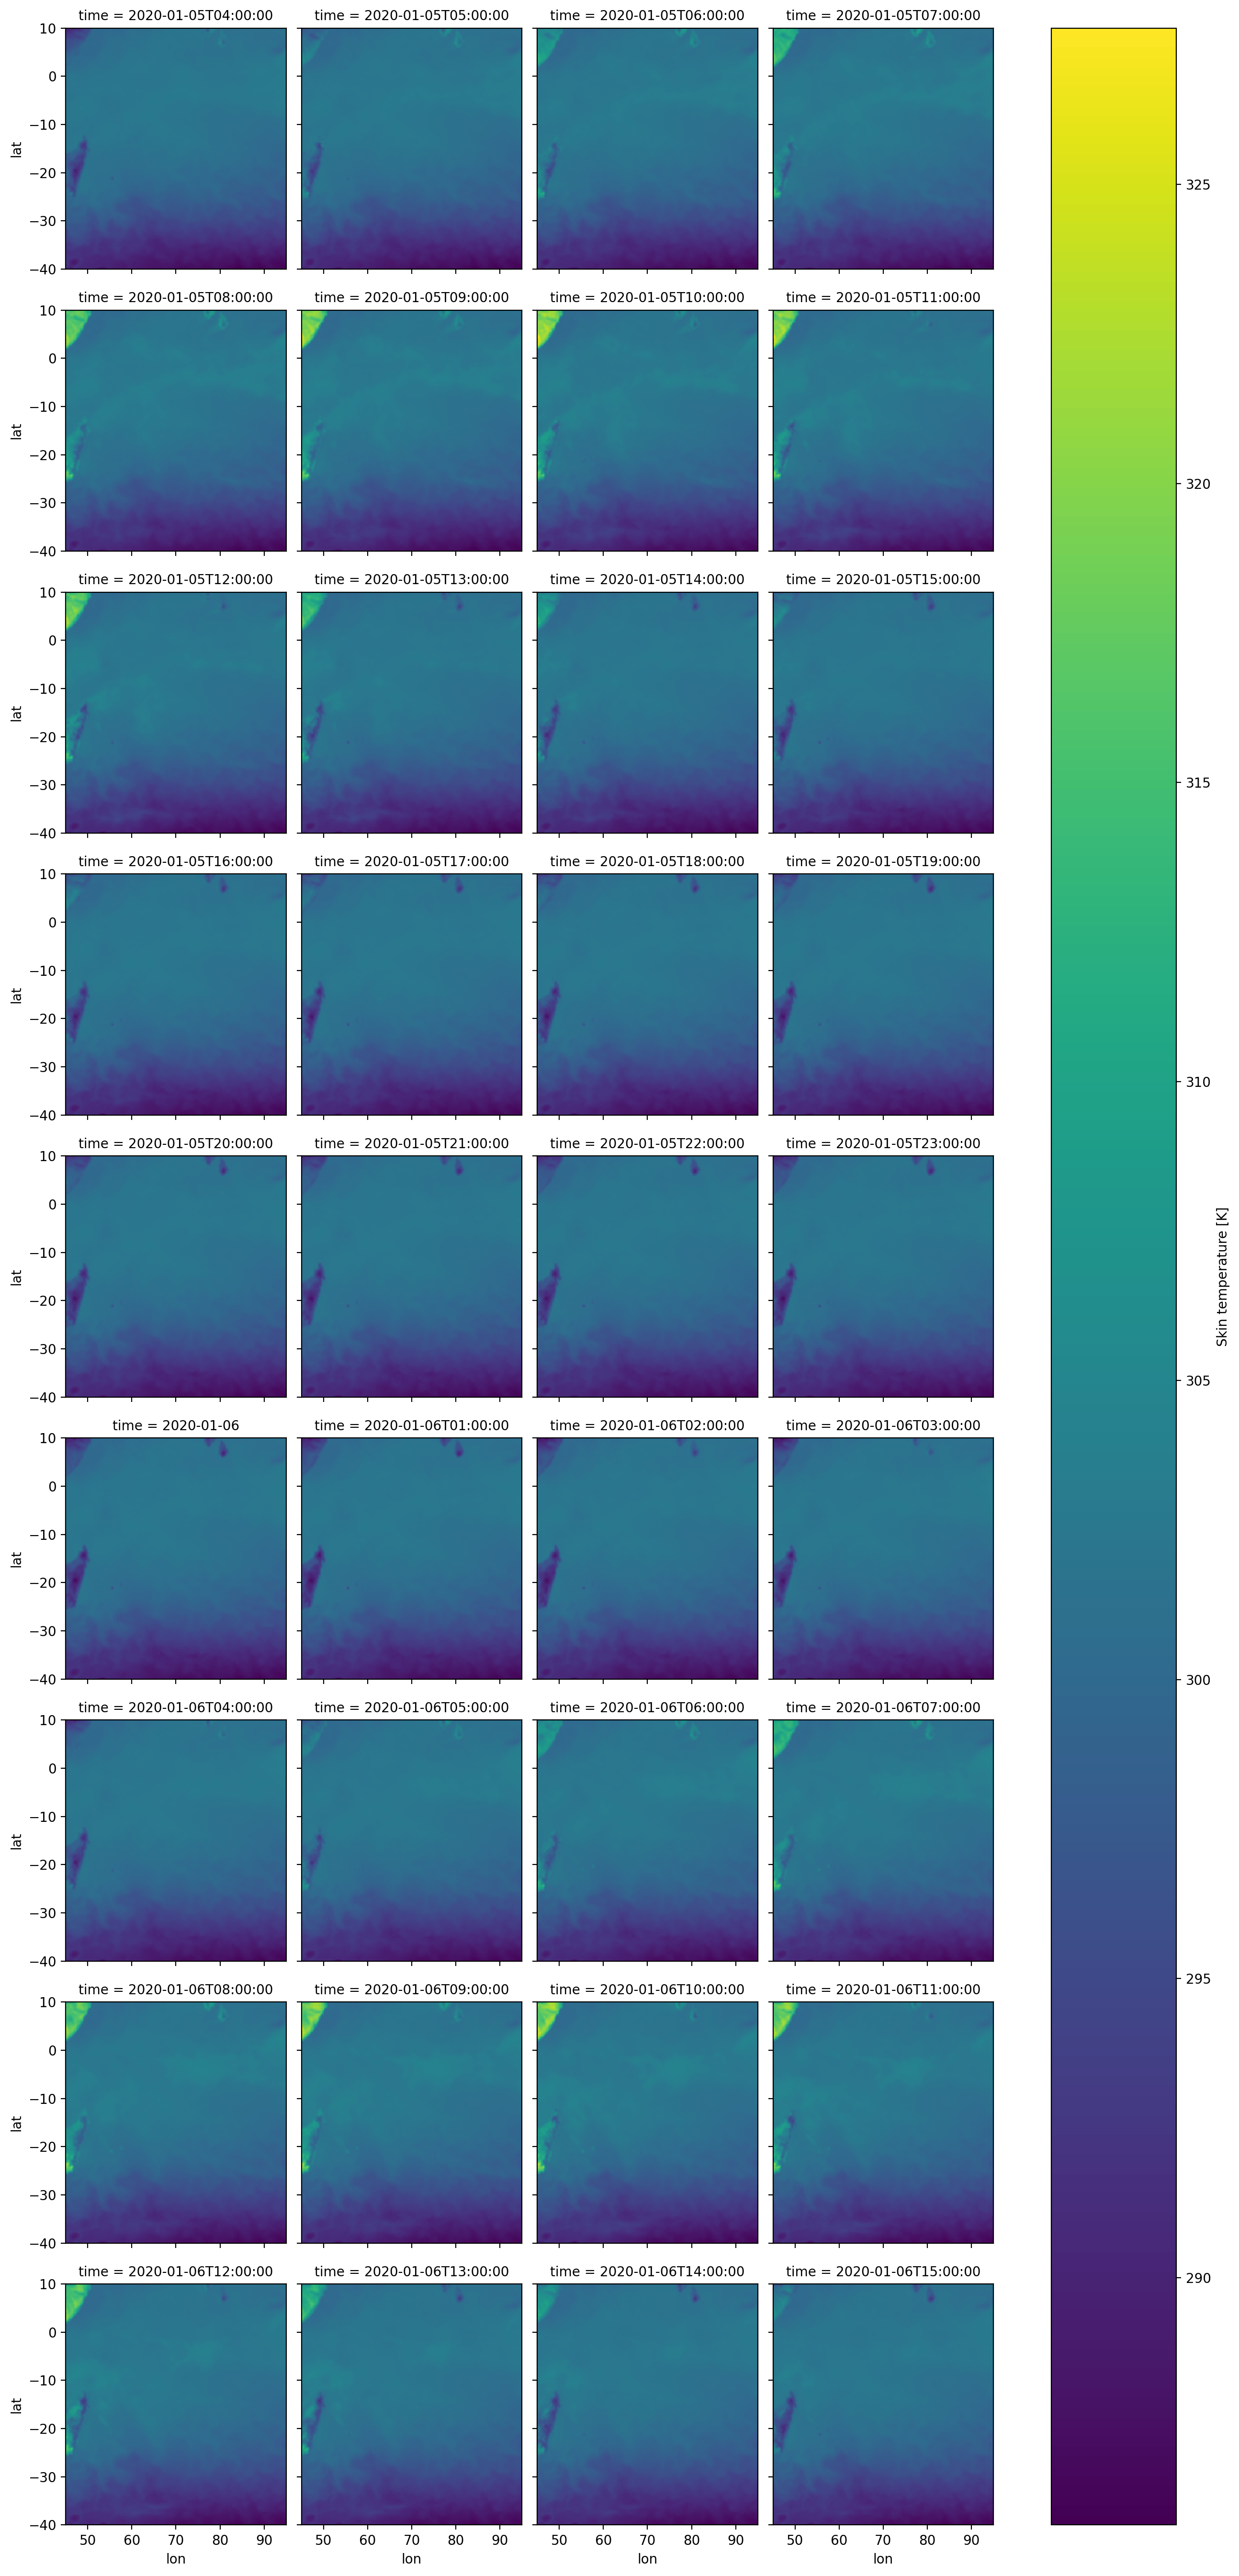

In [17]:
subsetfull.isel(time=slice(100,136)).plot(col="time",col_wrap=4)

In [18]:
subset.data


array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
   

In [19]:
smean=subset.mean(dim="time",skipna=True)


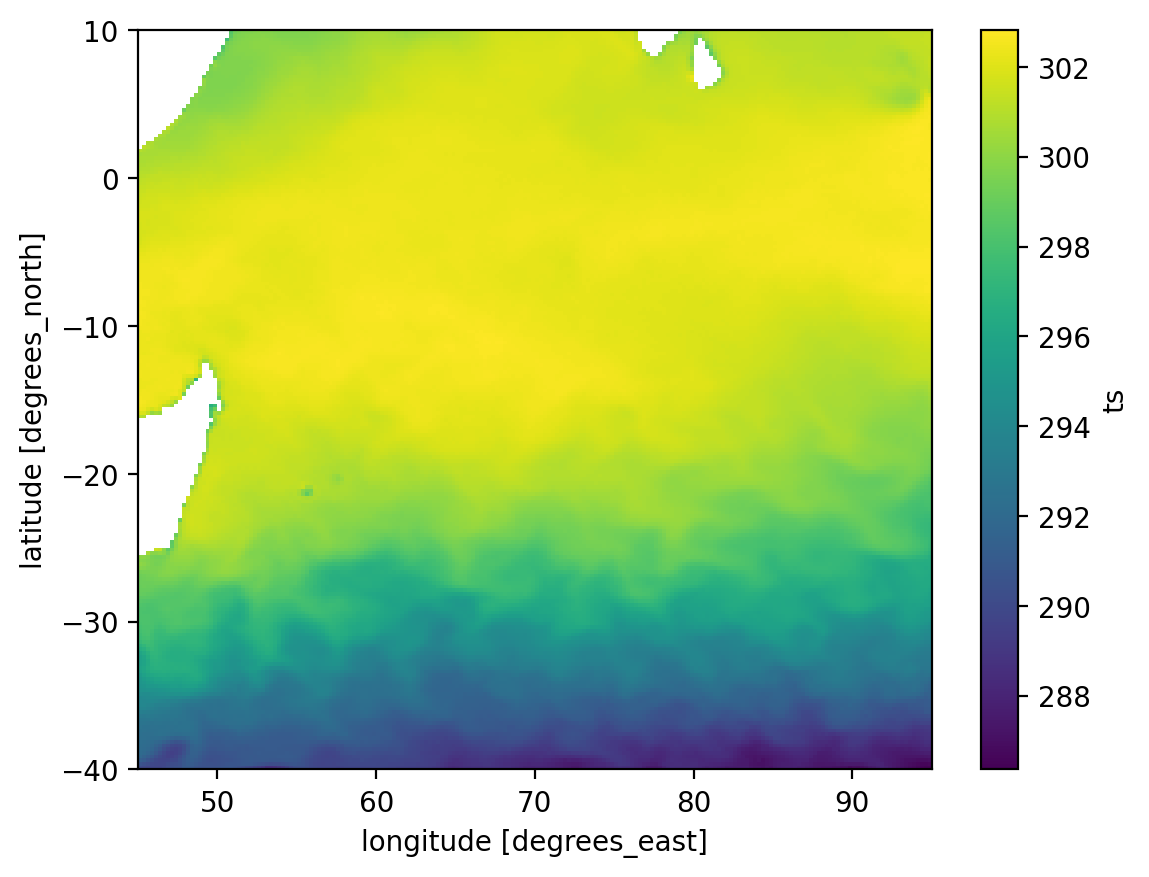

In [20]:
smean.plot()

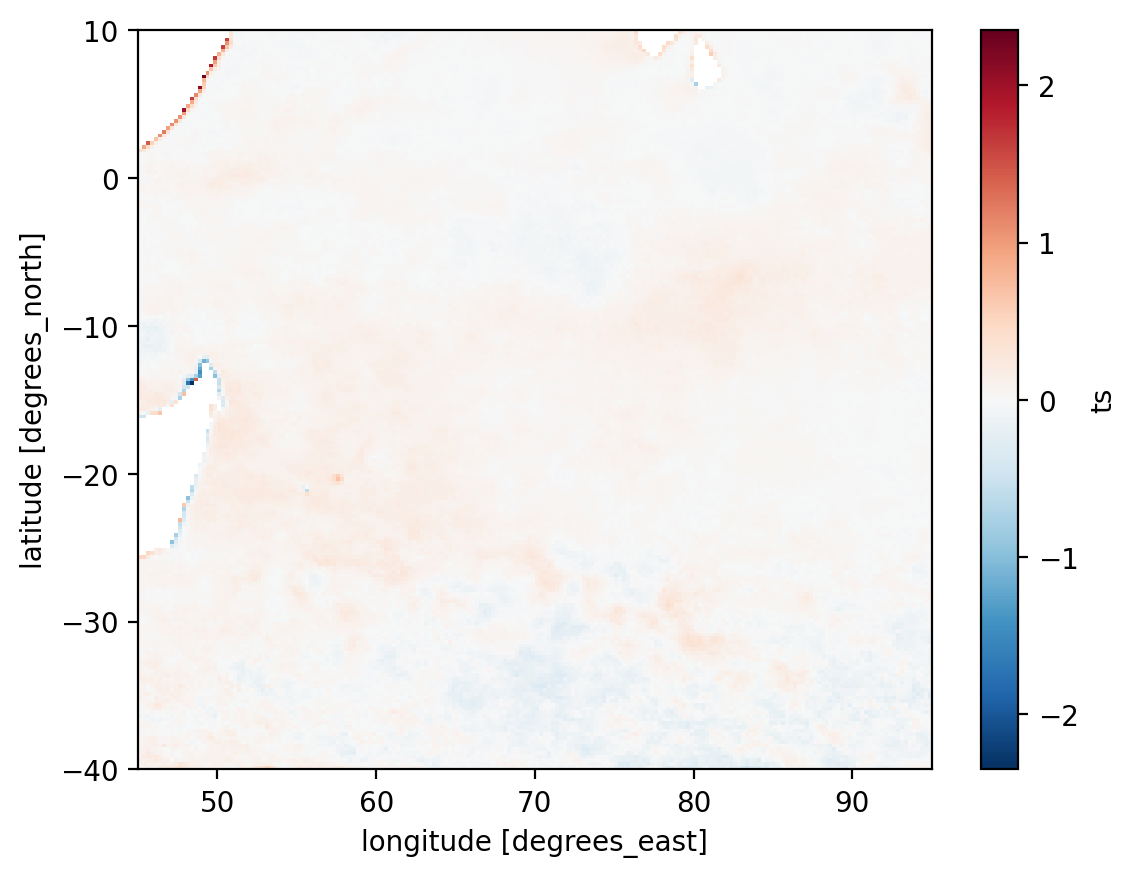

In [21]:
(subsetfull.mean(dim="time",skipna=True) - smean).plot()

In [23]:
subsetmm = ds_mm["ts"].isel(lat=slice(200,400),lon=slice(900,1100))

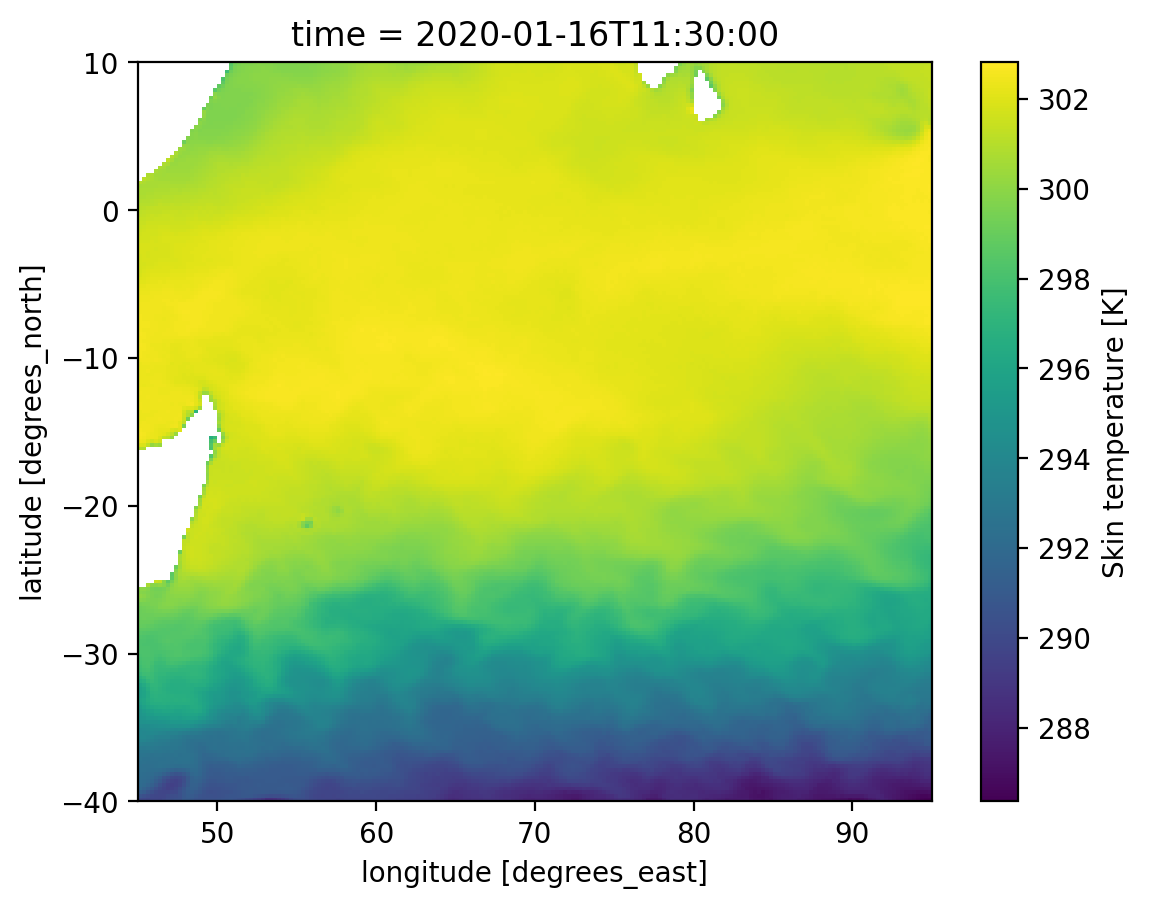

In [25]:
subsetmm.plot()


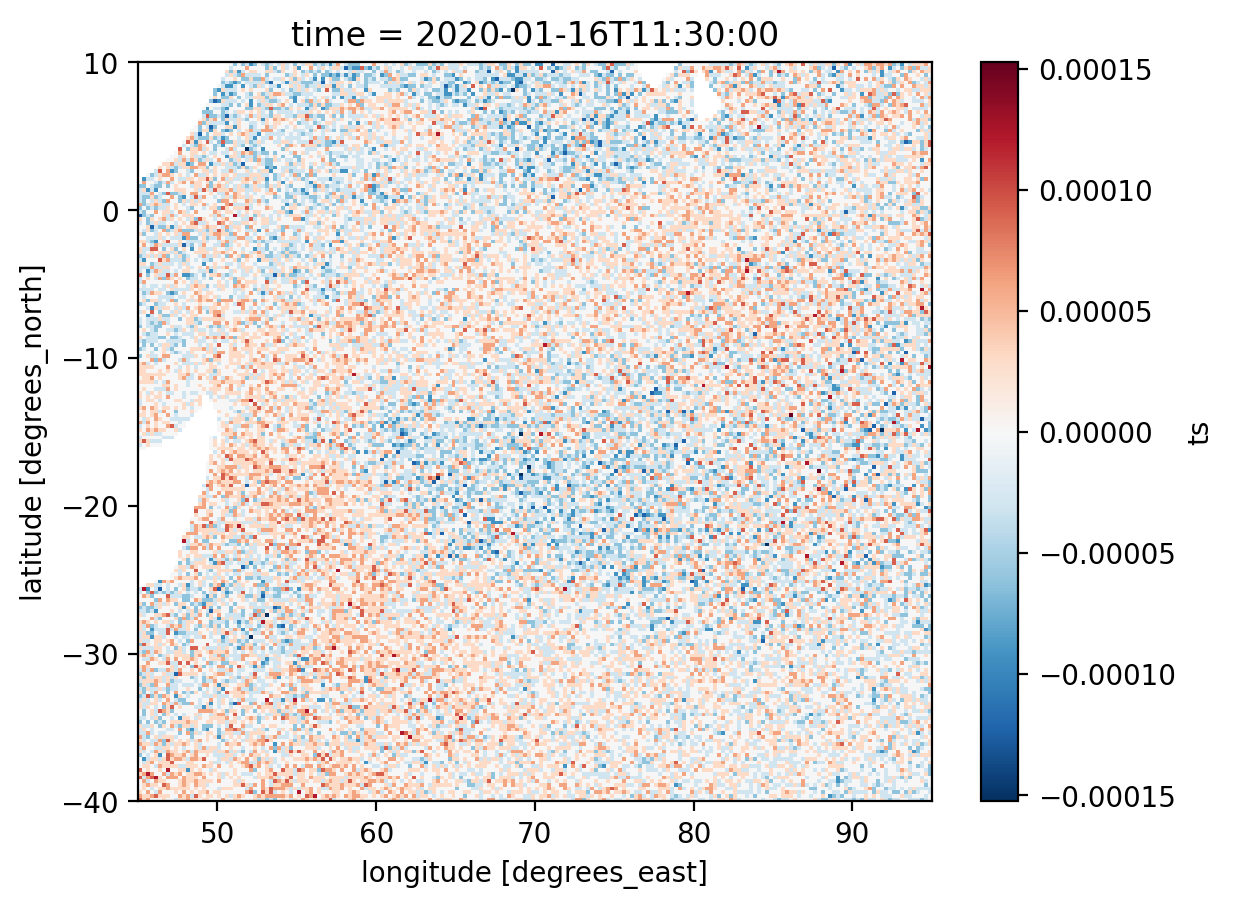

In [26]:
(subsetmm - smean).plot()

In [27]:
smeanfull= subsetfull.mean(dim="time",skipna=True)

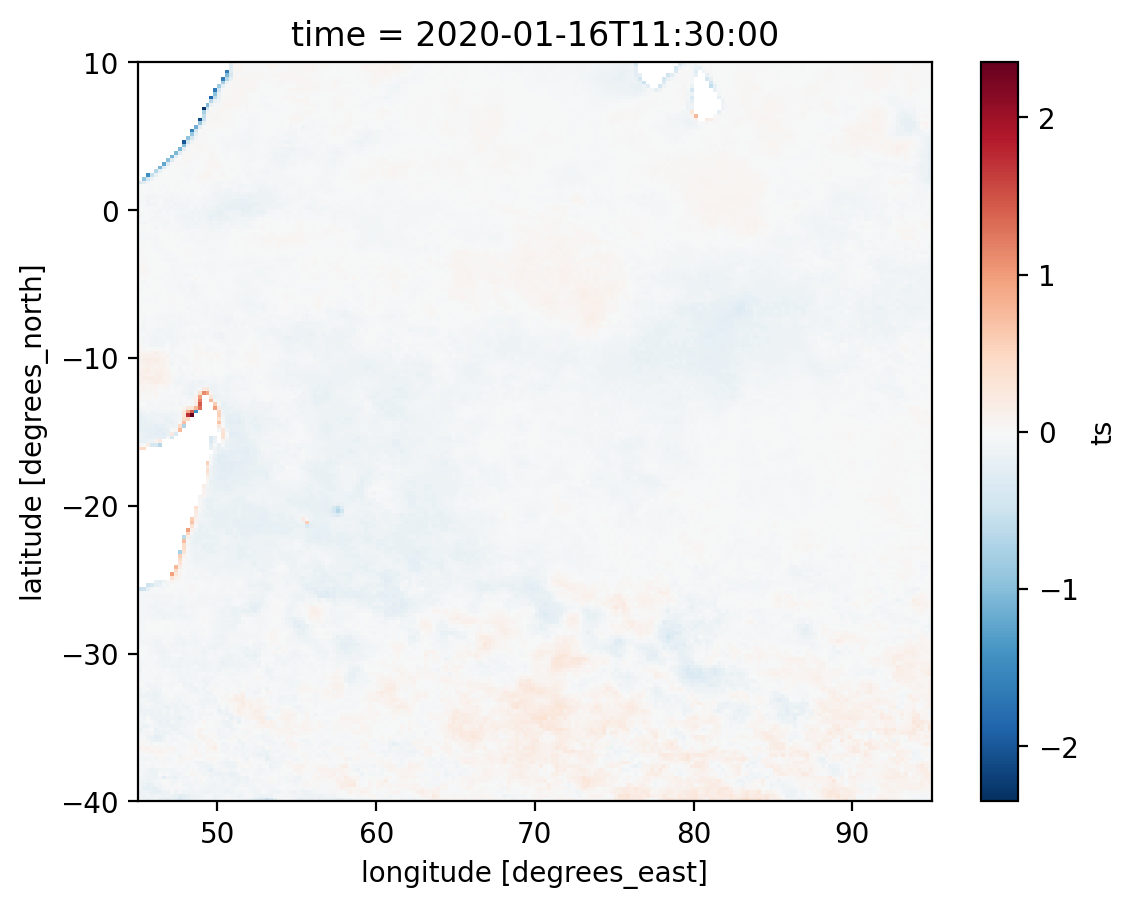

In [28]:
(subsetmm - smeanfull).plot()

In [30]:
subsetmf = ds_mfull["ts"].isel(lat=slice(200,400),lon=slice(900,1100))

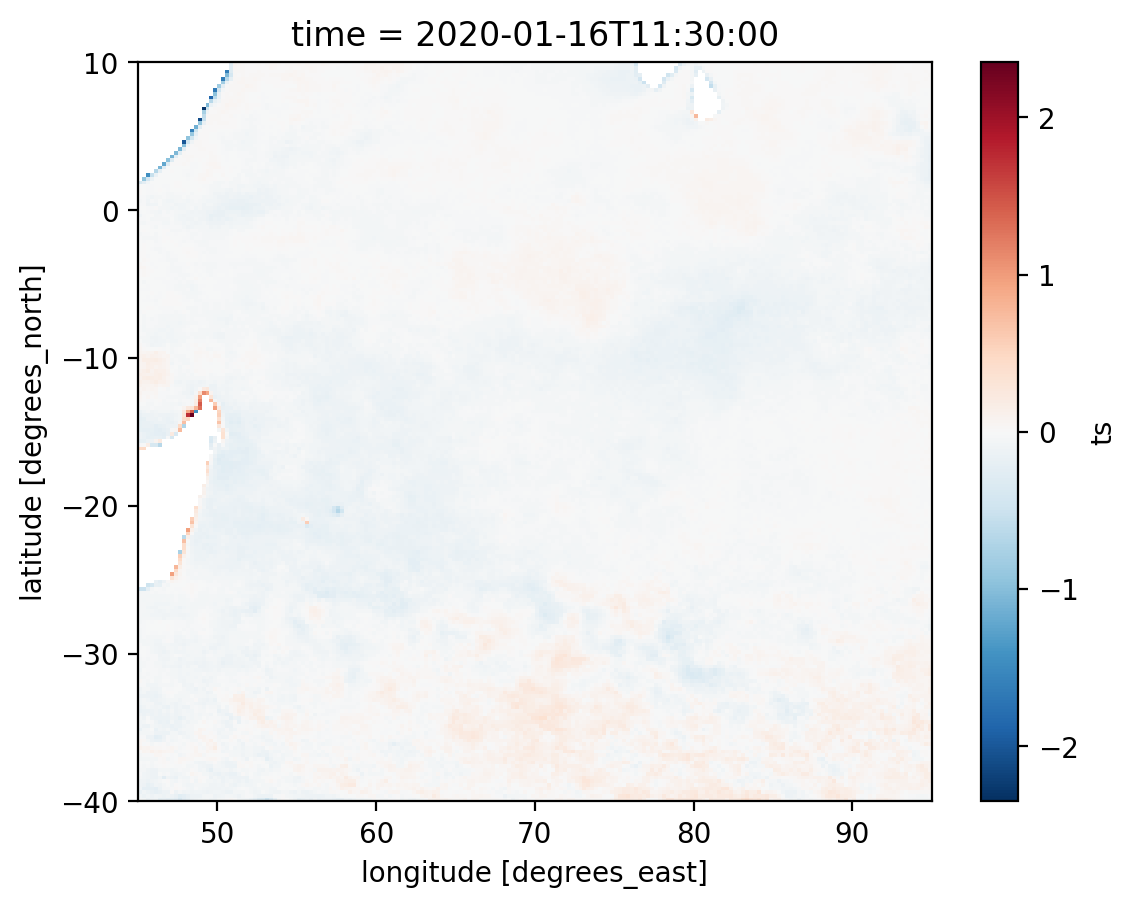

In [32]:
(subsetmm - subsetmf).plot()

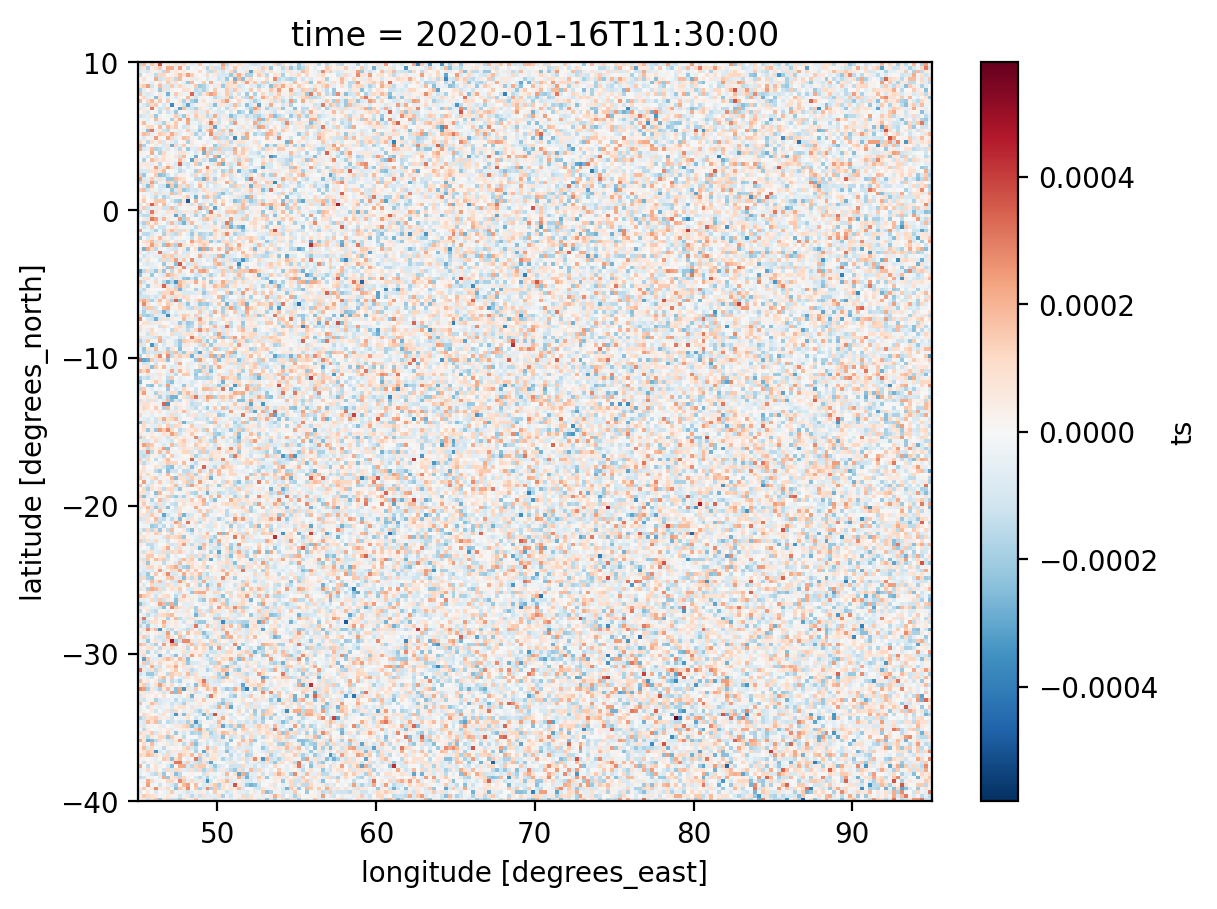

In [34]:
(smeanfull - subsetmf).plot()

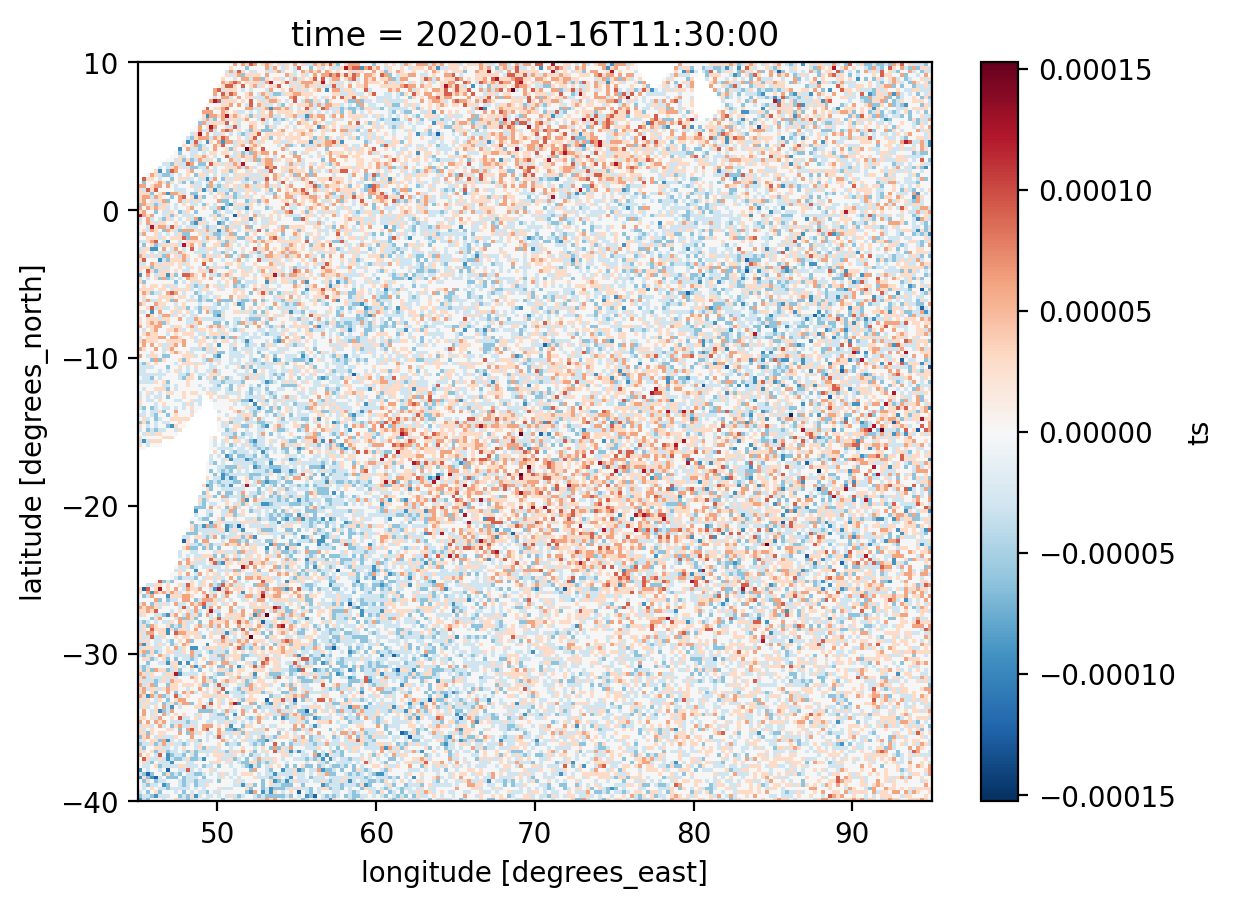

In [35]:
(smean - subsetmm).plot()